In [1]:
import os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.optimize import curve_fit

In [2]:
test = pd.read_pickle('../data/counting.pkl')

In [3]:
test[test['count']==test['count'].max()]

,uid,tid,count
32931,7,29455,2119


In [4]:
lh = pd.read_pickle('../data/counting_id.pkl')

In [5]:
len(lh['uid'].unique())

952

In [6]:
################################
#                              #
#       Listening counts       #
#                              #
################################

In [7]:
lh[lh['count']==lh['count'].max()]

,uid,tid,count
26610,7,24571,2069


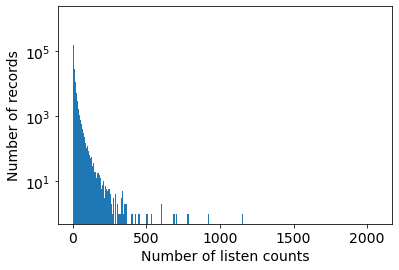

In [8]:
lh_list = lh['count'].values.tolist()
plt.rcParams.update({'font.size': 14})
bins = [i for i in range(0,lh['count'].max()+1,1)]
plt.hist(lh_list, bins=bins)
plt.xlabel('Number of listen counts')
plt.ylabel('Number of records')
plt.yscale('log')
plt.savefig('./dv_all.png', dpi=600)
plt.show()

In [9]:
lh_u_max = lh[lh['uid']==7]
lh_u_max = lh_u_max.sort_values(by='count', ascending='True')
lh_u_max[-15:]

,uid,tid,count
26711,7,24672,337
26715,7,24676,338
26714,7,24675,340
26756,7,24717,1865
26612,7,24573,1893
26754,7,24715,2026
26753,7,24714,2041
26749,7,24710,2049
26747,7,24708,2051
26611,7,24572,2052


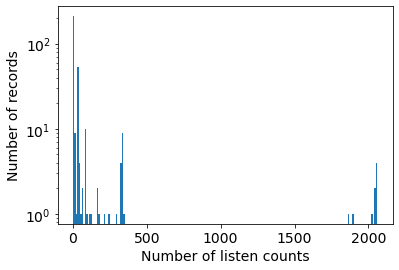

In [10]:
lh_list = lh_u_max['count'].values.tolist()
plt.rcParams.update({'font.size': 14})
bins = [i for i in range(0,lh_u_max['count'].max()+1,10)]
n, bins, patches = plt.hist(lh_list, bins=bins)
plt.xlabel('Number of listen counts')
plt.ylabel('Number of records')
plt.yscale('log')
plt.savefig('./dv_freq_user.png', dpi=600)
plt.show()

In [11]:
lh_user_scale = lh.groupby(["uid"]).sum().reset_index().sort_values(by='uid', ascending=False)
lh_user_scale

,uid,tid,count
951,1016,419704612,14379
950,1015,146931666,23643
949,1014,417234422,30804
948,1013,69253780,4946
947,1012,21673440,4172
...,...,...,...
4,4,14029451,11068
3,3,60107294,12477
2,2,35300728,14311
1,1,37461788,46507


In [37]:
y = sorted(lh_user_scale['count'].tolist(), reverse = True)
x = [i for i in range(1,len(y)+1,1)]
len(x), len(y)

(952, 952)

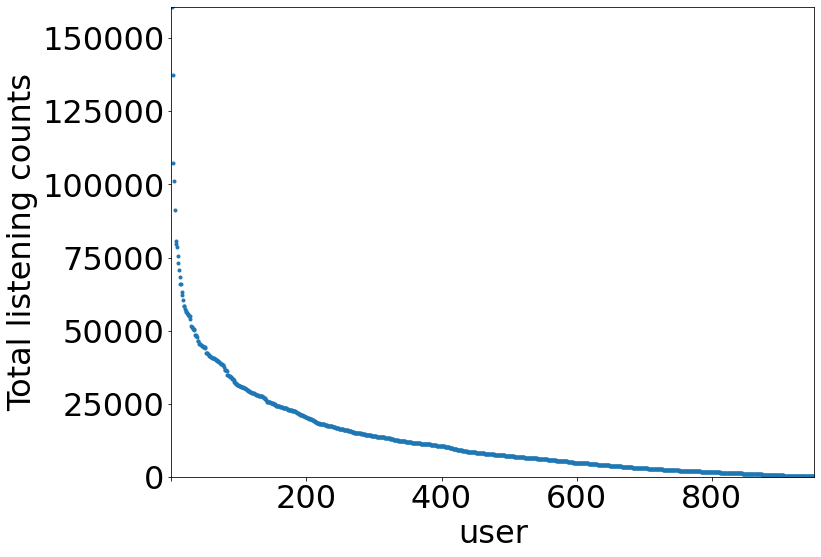

In [38]:
fig_x=1.8
#設定大小跟x軸兩端的值
plt.rcParams.update({'font.size': 32})
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
# plt.yscale('log')
plt.xlim(0, max(x))
plt.ylim(0, max(y))

plt.scatter(x, y, marker='.') 
plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)


#視覺化標題跟xy軸名稱
plt.xlabel('user')
plt.ylabel('Total listening counts')
plt.savefig('./dv_freq_users.png', dpi=600)
#出圖
plt.show()

In [14]:
#################################
#                               #
#       Popularity-bias         #
#                               #
#################################

In [40]:
lh_pop = lh.groupby(["tid"]).sum().reset_index().sort_values(by='count', ascending=False)
lh_pop

,tid,uid,count,u
3441,5330,167267,3991,321
3683,5644,159651,3651,318
3633,5592,175915,3532,345
2343,3991,121082,3479,233
1321,2608,131721,3462,262
...,...,...,...,...
23698,39200,329,4,4
168065,660959,2644,4,4
137261,321250,2062,4,4
156136,449244,3161,4,4


In [94]:
y = sorted(lh_pop['count'].tolist()[3:], reverse = True)
x = [i for i in range(1,len(y)+1,1)]
len(x), len(y)

(169261, 169261)

/home/han/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


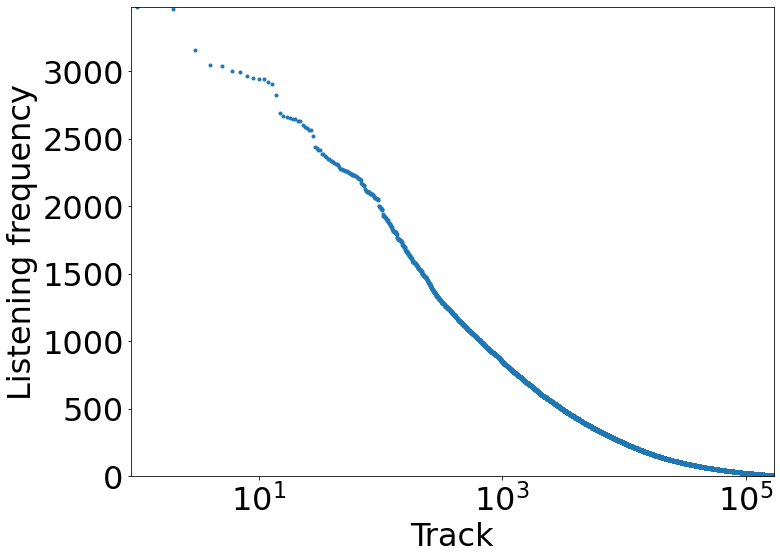

In [96]:
fig_x=1.8
#設定大小跟x軸兩端的值
plt.rcParams.update({'font.size': 32})
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
plt.xscale('log')
# plt.yscale('log')
plt.xlim(0, max(x))
plt.ylim(0, max(y))
plt.scatter(x, y, marker='.') 
plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)


#視覺化標題跟xy軸名稱
plt.xlabel('Track')
plt.ylabel('Listening frequency')
plt.savefig('./dv_pop_bias.png', dpi=600)
#出圖
plt.show()

In [88]:
top_items = lh_pop[:int(len(lh_pop)/20)]
top_items

,tid,uid,count,u
3441,5330,167267,3991,321
3683,5644,159651,3651,318
3633,5592,175915,3532,345
2343,3991,121082,3479,233
1321,2608,131721,3462,262
...,...,...,...,...
10730,14724,22006,276,46
96318,185251,30088,276,61
66130,111028,23881,276,48
168286,673838,3780,276,5


In [100]:
lh_pop.sort_values(by=['u'])

,tid,uid,count,u
169263,960440,1016,1,1
132916,300078,2000,45,4
135422,308236,1710,6,4
141477,343952,2196,6,4
129880,290849,2213,15,4
...,...,...,...,...
3441,5330,167267,3991,321
762,1637,165534,2519,326
2979,4690,167734,2316,333
3634,5593,170910,2565,338


In [89]:
top_items = top_items['tid'].tolist()
linear_top_items = lh[lh['tid'].isin(top_items)]
len(linear_top_items)

690034

In [90]:
pop_ratio = []
for u in lh['uid'].unique():
    pop_ratio.append(len(linear_top_items[linear_top_items['uid']==u])/len(lh[lh['uid']==u]))

In [91]:
# original data 
y = sorted(pop_ratio, reverse = False)
x = [i for i in range(1,len(y)+1,1)]
len(x), len(y)

(952, 952)

In [92]:
y

[0.0,
 0.01639344262295082,
 0.019193857965451054,
 0.023728813559322035,
 0.02912621359223301,
 0.03501945525291829,
 0.03592814371257485,
 0.04045422285308729,
 0.041158536585365856,
 0.04152249134948097,
 0.04285714285714286,
 0.04339250493096647,
 0.04617117117117117,
 0.04701627486437613,
 0.055384615384615386,
 0.05543710021321962,
 0.05858854860186418,
 0.058854440357330534,
 0.06225014277555682,
 0.06430006697923643,
 0.06713780918727916,
 0.06963087248322147,
 0.07047619047619047,
 0.07482993197278912,
 0.07532956685499058,
 0.07590404582885786,
 0.0781547845977888,
 0.07874720357941835,
 0.07956204379562044,
 0.08102766798418973,
 0.08389261744966443,
 0.0846774193548387,
 0.08566329565734682,
 0.08577405857740586,
 0.08592471358428805,
 0.09240994854202401,
 0.09343703388024718,
 0.09523809523809523,
 0.09671361502347418,
 0.09776833156216791,
 0.09983361064891846,
 0.10092918936238385,
 0.1015269220466113,
 0.10189823358818877,
 0.10460251046025104,
 0.10466321243523316,
 0

In [93]:
n = 0
for i in y:
    if i < 0.2:
        n += 1
n

253

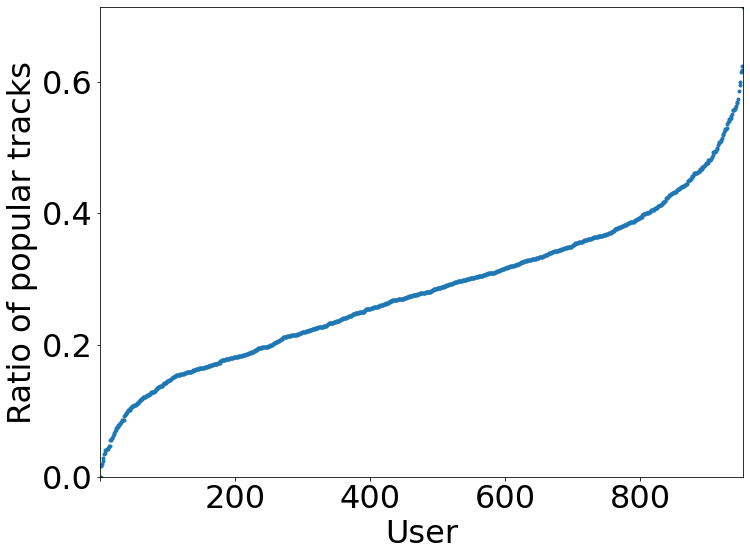

In [87]:
fig_x=1.8
#設定大小跟x軸兩端的值
plt.rcParams.update({'font.size': 32})
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
plt.xlim(0, max(x))
plt.ylim(0, max(y))
plt.scatter(x, y, marker='.') 

plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)

#視覺化標題跟xy軸名稱
plt.xlabel('User')
plt.ylabel('Ratio of popular tracks')

plt.savefig('./dv_pop_ratio.png', dpi=600)
#出圖
plt.show()

In [21]:
# original data 
y = sorted(pop_ratio, reverse = True)
x = [i for i in range(1,len(y)+1,1)]
len(x), len(y)

(953, 953)

In [ ]:
#################################
#                               #
#     Rating Normalization      #
#                               #
#################################

In [54]:
dir_ = '../data/'
file_name = 'normalized_to_rating_filter_track_5_user_100.csv'
linear = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
linear

,uid,tid,rating,minmax,count
10,0,0,5.00,1.928571,27
17,0,1,3.75,0.500000,7
18,0,2,4.00,0.571429,8
20,0,3,4.00,0.571429,8
21,0,4,3.75,0.500000,7
...,...,...,...,...,...
4407426,952,157281,0.25,0.089286,1
4407447,952,157461,1.75,0.178571,2
4407453,952,157465,3.25,0.357143,4
4407473,952,157517,4.25,0.625000,7


In [101]:
v = linear['rating'].values.tolist()
b = [i for i in np.arange(0.25,5.25,0.25)]

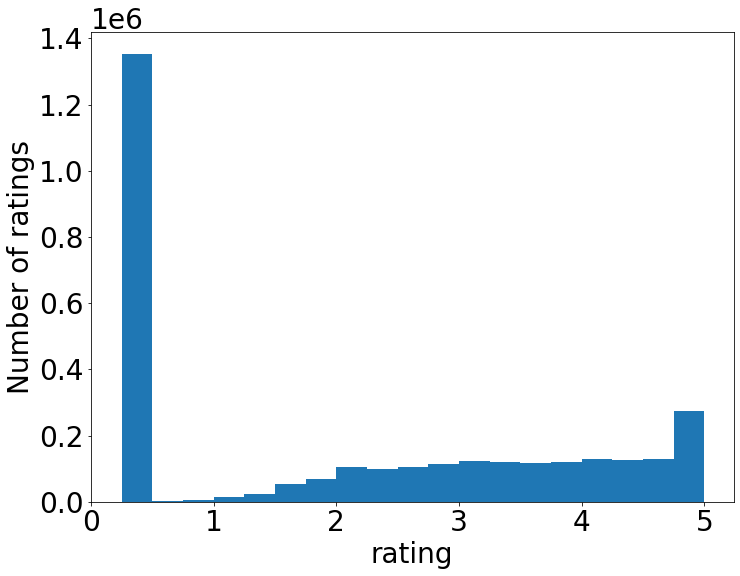

In [102]:
fig_x=1.8
plt.rcParams.update({'font.size': 28})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
# plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.savefig('./dv_rating_linear.png', dpi=600)
plt.show()

In [103]:
dir_ = '../data/'
file_name = 'normalized_log_filter_track_5_user_100.csv'
log = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
log

,uid,tid,rating,count
10,0,0,1.447158,27
17,0,1,0.903090,7
18,0,2,0.954243,8
20,0,3,0.954243,8
21,0,4,0.903090,7
...,...,...,...,...
4407426,952,157281,0.301030,1
4407447,952,157461,0.477121,2
4407453,952,157465,0.698970,4
4407473,952,157517,0.903090,7


In [104]:
v = log['rating'].values.tolist()
b = [i for i in np.arange(0.25,5.25,0.25)]

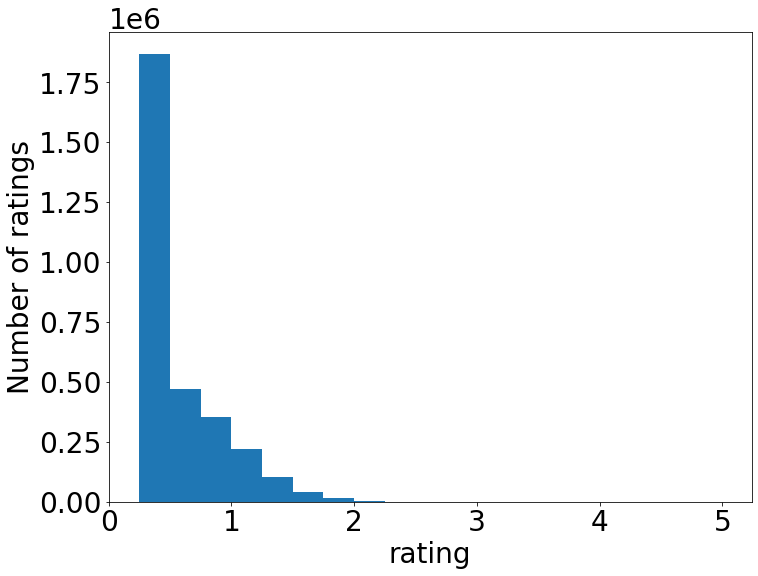

In [105]:
fig_x=1.8
plt.rcParams.update({'font.size': 28})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
# plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.savefig('./dv_rating_log.png', dpi=600)
plt.show()

In [67]:
dir_ = '../data/'
file_name = 'normalized_minmax_filter_track_5_user_100.csv'
minmax = pd.read_pickle(os.path.join(dir_, file_name[:-3] + 'pkl'))
minmax

,uid,tid,rating
10,0,0,1.928571
17,0,1,0.500000
18,0,2,0.571429
20,0,3,0.571429
21,0,4,0.500000
...,...,...,...
4407426,952,157281,0.089286
4407447,952,157461,0.178571
4407453,952,157465,0.357143
4407473,952,157517,0.625000


In [106]:
v = minmax['rating'].values.tolist()
b = [i for i in np.arange(0.25,5.25,0.25)]

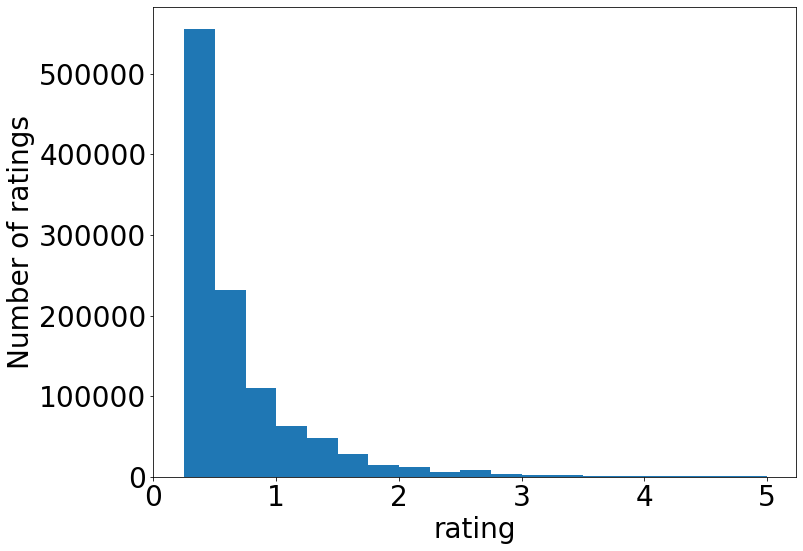

In [107]:
fig_x=1.8
plt.rcParams.update({'font.size': 28})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(v, bins=b)
# plt.yscale('log')
plt.ylabel('Number of ratings')
plt.xlabel('rating')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.savefig('./dv_rating_minmax.png', dpi=600)
plt.show()

In [ ]:
#################################
#                               #
#       Pop. Normalization      #
#                               #
#################################

In [7]:
# POP form listening users
tid_list = []
pop_list = []
for i in tqdm(lh['tid'].unique()):
    tid_list.append(i)
    pop_list.append(len(lh[lh['tid']==i]))
    
d = {'tid': tid_list, 'rating': pop_list}
df_pop_u = pd.DataFrame(data=d)
df_pop_u = df_pop_u.sort_values(by=['rating'], ascending=False)
df_pop_u[:10]

,tid,rating
153,153,773
8087,8087,555
833,833,539
4308,4308,535
198,198,534
18382,18382,534
466,466,512
8296,8296,511
2164,2164,486
2931,2931,483


In [10]:
lh_list_u = df_pop_u['rating'].values.tolist()
bins_u = [i for i in range(0,df_pop_u['rating'].max()+1,1)]

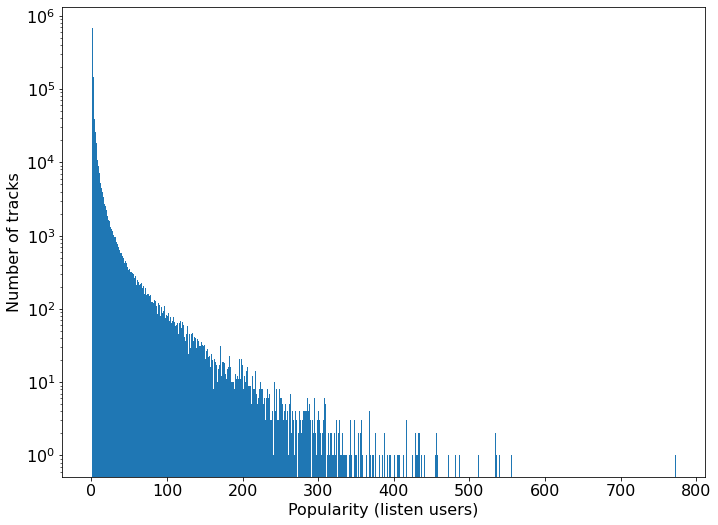

In [11]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(lh_list_u, bins=bins_u)
plt.yscale('log')
plt.ylabel('Number of tracks')
plt.xlabel('Popularity (listen users)')
plt.savefig('./dv_pop_user.png', dpi=600)
plt.show()

In [8]:
# POP form listening counts
tid_list = []
pop_list = []
for i in tqdm(lh['tid'].unique()):
    tid_list.append(i)
    pop_list.append(lh[lh['tid']==i].sum()['count'])
    
d = {'tid': tid_list, 'rating': pop_list}
df_pop_c = pd.DataFrame(data=d)
df_pop_c = df_pop_c.sort_values(by=['rating'], ascending=False)
df_pop_c[:10]

,tid,rating
153,153,17561
2287,2287,6926
198,198,6586
18382,18382,6304
1976,1976,6234
4308,4308,6002
6121,6121,5676
8087,8087,5658
5984,5984,5627
3943,3943,5571


In [13]:
lh_list_c = df_pop_c['rating'].values.tolist()
bins_c = [i for i in range(0,df_pop_c['rating'].max()+1000,1)]

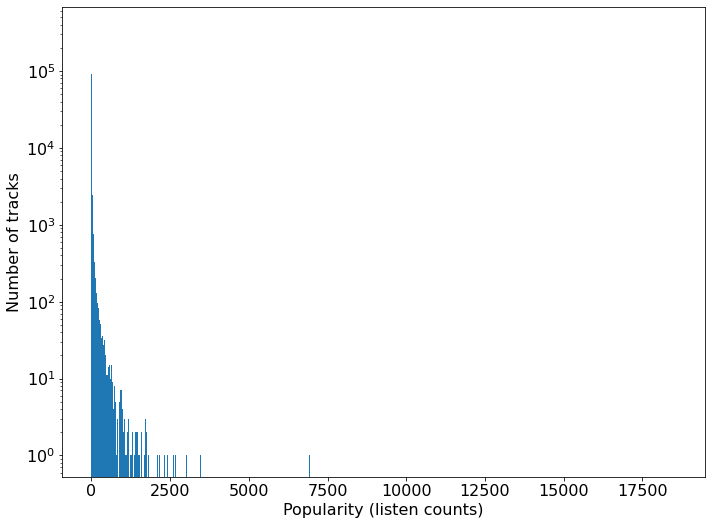

In [14]:
fig_x=1.8
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6.4*fig_x, 4.8*fig_x))
plt.hist(lh_list_c, bins=bins_c)
plt.yscale('log')
plt.ylabel('Number of tracks')
plt.xlabel('Popularity (listen counts)')
plt.savefig('./dv_pop_count.png', dpi=600)
plt.show()

In [24]:
pop_c = lh.groupby(["tid"]).sum().reset_index().sort_values(by='count', ascending=False)
pop_c

,tid,uid,count
3441,5330,167267,3991
3683,5644,159651,3651
3633,5592,175915,3532
2343,3991,121082,3479
1321,2608,131721,3462
...,...,...,...
23698,39200,329,4
168065,660959,2644,4
137261,321250,2062,4
156136,449244,3161,4


In [25]:
lh['u'] = 1
pop_u = lh.groupby(["tid"]).sum().reset_index().sort_values(by='u', ascending=False)
pop_u

,tid,uid,count,u
3633,5592,175915,3532,345
3634,5593,170910,2565,338
2979,4690,167734,2316,333
762,1637,165534,2519,326
3441,5330,167267,3991,321
...,...,...,...,...
69557,121003,1553,6,4
92339,174797,1130,6,4
128863,287092,1692,9,4
128862,287090,1692,7,4


In [27]:
pop_u = pop_u.sort_values(by=['tid'], ascending=False)
pop_c = pop_c.sort_values(by=['tid'], ascending=False)

In [29]:
pop_u['r'] = pop_u['u']/len(lh['uid'].unique())
pop_u

,tid,uid,count,u,r
169263,960440,1016,1,1,0.001050
169262,901748,4731,23,5,0.005252
169261,885526,4712,19,5,0.005252
169260,883649,4645,6,5,0.005252
169259,881771,4813,8,5,0.005252
...,...,...,...,...,...
4,10,4482,36,10,0.010504
3,9,6534,45,15,0.015756
2,7,6263,40,12,0.012605
1,6,9789,66,22,0.023109


In [32]:
pop_c['r'] = pop_c['count']/sum(pop_c['count'])
pop_c

,tid,uid,count,r
169263,960440,1016,1,7.969968e-08
169262,901748,4731,23,1.833093e-06
169261,885526,4712,19,1.514294e-06
169260,883649,4645,6,4.781981e-07
169259,881771,4813,8,6.375974e-07
...,...,...,...,...
4,10,4482,36,2.869188e-06
3,9,6534,45,3.586486e-06
2,7,6263,40,3.187987e-06
1,6,9789,66,5.260179e-06


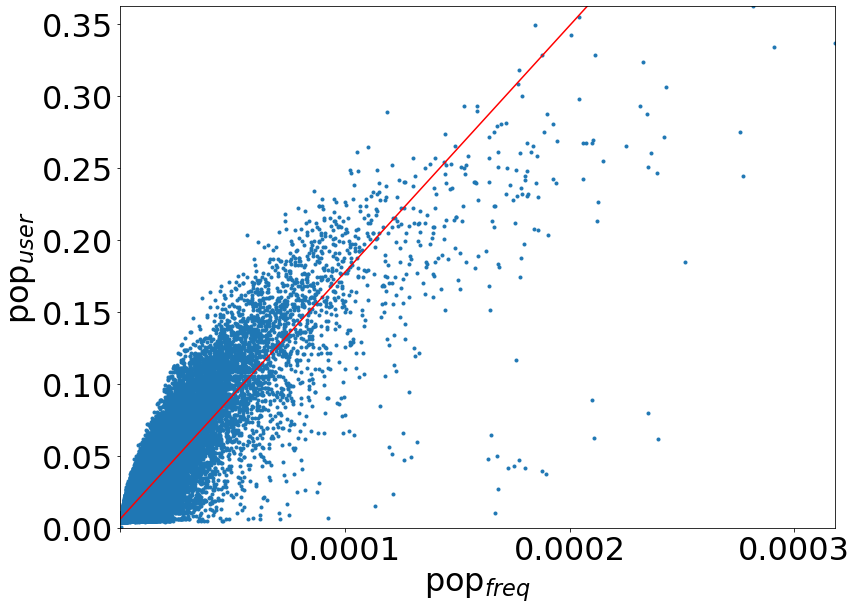

0.8899549582813578

In [74]:
fig_x = 2
x = pop_c['r'].values.tolist()
y = pop_u['r'].values.tolist()
#設定大小跟x軸兩端的值
plt.rcParams.update({'font.size': 32})
plt.figure(figsize = (6.4*fig_x, 4.8*fig_x))
plt.xlim(0, max(x))
plt.ylim(0, max(y))
plt.scatter(x, y, marker='.') 

pearR = np.corrcoef(x,y)[1,0]
param = np.polyfit(x, y, 1) # n=1为一次函数，返回函数参数
x1 = np.linspace(0,max(x),10000)
y1 = np.polyval(param, x1) # 拼接方程
plt.plot(x1, y1,"r-")
plt.xticks([0, 0.0001, 0.0002, 0.0003])
plt.gca().xaxis.get_major_ticks()[0].label1.set_visible(False)

#視覺化標題跟xy軸名稱
plt.xlabel('pop$_{freq}$')
plt.ylabel('pop$_{user}$')
plt.savefig('./dv_pop_compare.png', dpi=600)
#出圖
plt.show()
pearR